# New Section

project AI Bootcamp

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# New Section

1-Linear Regression

In [3]:
data = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [4]:
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   
2    -117.81     33.78                27.0       3589.0           507.0   
3    -118.36     33.82                28.0         67.0            15.0   
4    -119.67     36.33                19.0       1241.0           244.0   

   population  households  median_income  median_house_value  
0      1537.0       606.0         6.6085            344700.0  
1       809.0       277.0         3.5990            176500.0  
2      1484.0       495.0         5.7934            270500.0  
3        49.0        11.0         6.1359            330000.0  
4       850.0       237.0         2.9375             81700.0  


In [6]:
X = data[['median_income']]
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [7]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 6355701945.134971
R^2 Score: 0.4953198289574966


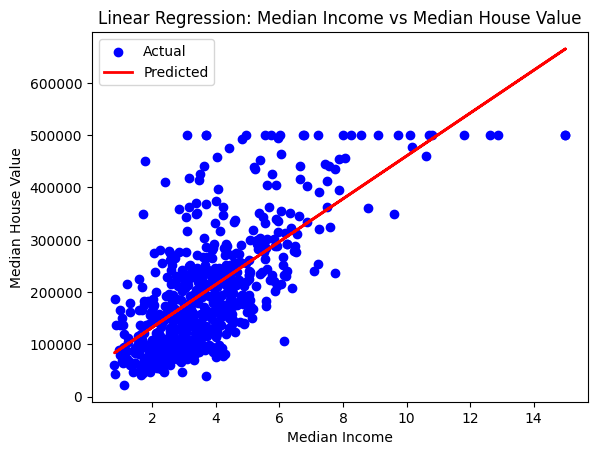

In [8]:

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Linear Regression: Median Income vs Median House Value')
plt.legend()
plt.show()

# New Section

2- Logistic Regression

In [9]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [10]:
data = pd.read_csv('/content/sample_data/california_housing_test.csv')
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   
2    -117.81     33.78                27.0       3589.0           507.0   
3    -118.36     33.82                28.0         67.0            15.0   
4    -119.67     36.33                19.0       1241.0           244.0   

   population  households  median_income  median_house_value  
0      1537.0       606.0         6.6085            344700.0  
1       809.0       277.0         3.5990            176500.0  
2      1484.0       495.0         5.7934            270500.0  
3        49.0        11.0         6.1359            330000.0  
4       850.0       237.0         2.9375             81700.0  


In [12]:
threshold = data['median_house_value'].median()
data['expensive'] = (data['median_house_value'] > threshold).astype(int)

X_class = data[['median_income']]
y_class = data['expensive']

X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_class_train, y_class_train)

y_class_pred = logistic_model.predict(X_class_test)

accuracy = accuracy_score(y_class_test, y_class_pred)
conf_matrix = confusion_matrix(y_class_test, y_class_pred)
class_report = classification_report(y_class_test, y_class_pred)


In [13]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7433333333333333
Confusion Matrix:
[[243  67]
 [ 87 203]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       310
           1       0.75      0.70      0.72       290

    accuracy                           0.74       600
   macro avg       0.74      0.74      0.74       600
weighted avg       0.74      0.74      0.74       600



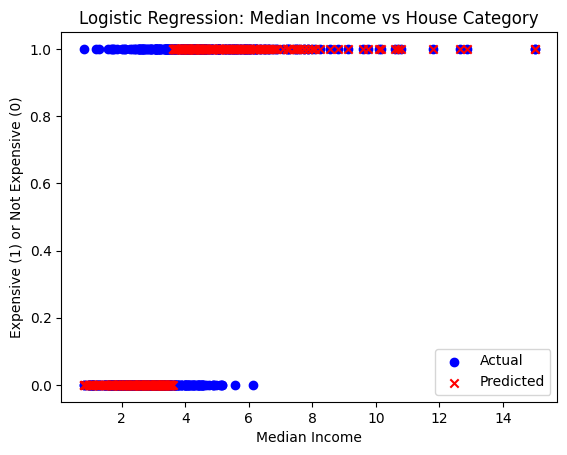

In [14]:
plt.scatter(X_class_test, y_class_test, color='blue', label='Actual')
plt.scatter(X_class_test, y_class_pred, color='red', marker='x', label='Predicted')
plt.xlabel('Median Income')
plt.ylabel('Expensive (1) or Not Expensive (0)')
plt.title('Logistic Regression: Median Income vs House Category')
plt.legend()
plt.show()

In [18]:
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)

Accuracy: 0.7433333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.78      0.76       310
           1       0.75      0.70      0.72       290

    accuracy                           0.74       600
   macro avg       0.74      0.74      0.74       600
weighted avg       0.74      0.74      0.74       600



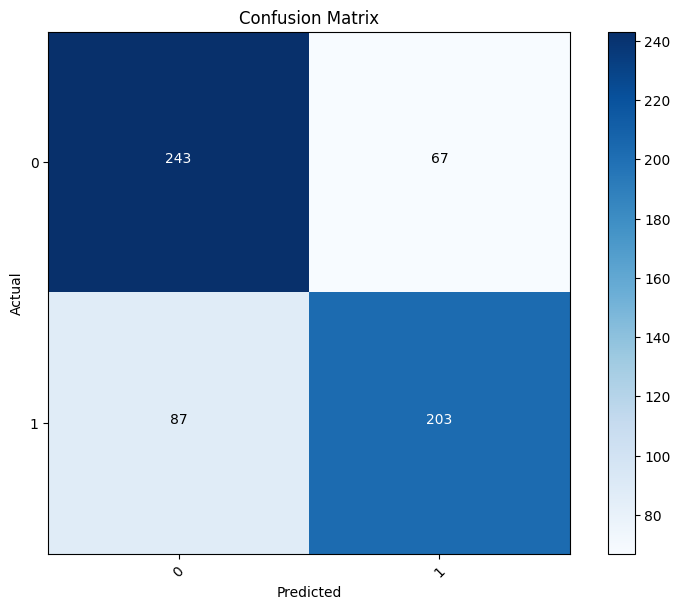

In [17]:
#I wanted to try this code from the course files


def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.Blues):

    plt.figure(figsize=(8, 6))  # Set the figure size
    plt.imshow(cm, interpolation='nearest', cmap=cmap)  # Display the confusion matrix as an image
    plt.title(title)  # Set the title of the plot
    plt.colorbar()  # Add a colorbar to the plot
    tick_marks = np.arange(len(cm))  # Create tick marks based on the confusion matrix size
    plt.xticks(tick_marks, ['0', '1'], rotation=45)  # Set x-axis tick labels and rotate them
    plt.yticks(tick_marks, ['0', '1'])  # Set y-axis tick labels

    # Formatting text inside the cells based on threshold
    thresh = cm.max() / 2.  # Set threshold to determine text color
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):  # Iterate over the confusion matrix cells
        plt.text(j, i, format(cm[i, j], 'd'),  # Place text in the cell
                 horizontalalignment="center",  # Center-align the text
                 color="white" if cm[i, j] > thresh else "black")  # Set text color based on threshold

    plt.tight_layout()  # Adjust the layout to fit everything
    plt.ylabel('Actual')  # Set the y-axis label
    plt.xlabel('Predicted')  # Set the x-axis label
    plt.show()  # Display the plot

# Plotting the confusion matrix
import itertools  # Import itertools for product function

plot_confusion_matrix(conf_matrix)